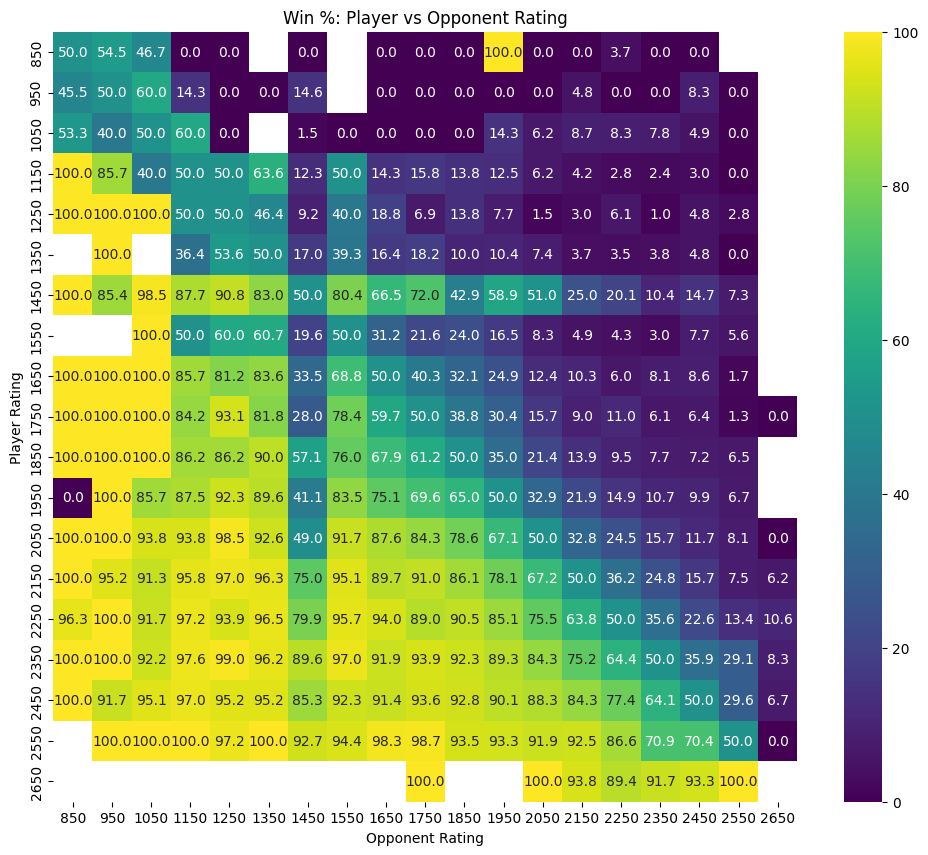

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# load and clean data
data = pd.read_csv('lichess_games_data.csv')
data.dropna(inplace=True)

# numerical-ouput
def encode_winner(player_color, winner):
    if winner == player_color:
        return 1
    elif winner == 'draw':
        return 0.5
    return 0

# prep data simply
white_data = data.copy()
white_data['player_rating'] = white_data['white_rating']
white_data['opponent_rating'] = white_data['black_rating']
white_data['win_outcome'] = white_data.apply(lambda row: encode_winner('white', row['winner']), axis=1)
black_data = data.copy()
black_data['player_rating'] = black_data['black_rating']
black_data['opponent_rating'] = black_data['white_rating']
black_data['win_outcome'] = black_data.apply(lambda row: encode_winner('black', row['winner']), axis=1)

#combine+ filter draws
combined_data = pd.concat([white_data, black_data])
combined_data = combined_data[combined_data['win_outcome'] != 0.5]

# bin ratings and group
bins = np.arange(800, 2800, 100)
labels = bins[:-1] + 50
combined_data['player_rating_bin'] = pd.cut(combined_data['player_rating'], bins, labels=labels)
combined_data['opponent_rating_bin'] = pd.cut(combined_data['opponent_rating'], bins, labels=labels)

# pivot for the win percentages
win_table = combined_data.pivot_table('win_outcome', index='player_rating_bin', columns='opponent_rating_bin', aggfunc='mean', observed = False) * 100

# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(win_table, annot=True, fmt=".1f", cmap='viridis')
plt.title('Win %: Player vs Opponent Rating')
plt.xlabel('Opponent Rating')
plt.ylabel('Player Rating')
plt.show()


data['rating_diff'] = data['white_rating'] - data['black_rating']

# Get win oucomes.
def encode_winner_simple(winner):
    if winner == 'white':
        return 1
    if winner == 'black':
        return 0
    return 0.5

data['win_outcome'] = data['winner'].apply(encode_winner_simple)

# win % grouped by diff bins
bins = np.arange(-1000, 1000, 50)
data['rating_diff_bin'] = pd.cut(data['rating_diff'], bins)
win_percentage = data.groupby('rating_diff_bin', observed=True)['win_outcome'].mean().reset_index()

# midpoints (grouping the categories of ratings)
win_percentage['rating_diff_mid'] = win_percentage['rating_diff_bin'].apply(lambda x: x.mid)

In [185]:
data.head(10)

,game_id,white,white_rating,black,black_rating,opening,winner,moves,link,rating_diff,win_outcome,rating_diff_bin
0,hN05at52,aapp_61,1678.0,zwenna,2442.0,Sicilian Defense: Bowdler Attack,black,54,https://lichess.org/hN05at52,-764.0,0.0,"(-800.0, -750.0]"
1,ttu4bd63,zwenna,2437.0,Aidas08,2136.0,"Sicilian Defense: Najdorf Variation, Zagreb Va...",white,77,https://lichess.org/ttu4bd63,301.0,1.0,"(300.0, 350.0]"
2,Qwoly8kd,Ugjgjgjvj,2058.0,zwenna,2434.0,"Italian Game: Two Knights Defense, Modern Bish...",black,44,https://lichess.org/Qwoly8kd,-376.0,0.0,"(-400.0, -350.0]"
3,eMJwQKDV,zwenna,2433.0,Narcisse29,1820.0,"French Defense: Tarrasch Variation, Pawn Cente...",white,21,https://lichess.org/eMJwQKDV,613.0,1.0,"(600.0, 650.0]"
4,8AFBBfka,zwenna,2433.0,Bracho2013,1089.0,Ruy Lopez: Berlin Defense,white,57,https://lichess.org/8AFBBfka,1344.0,1.0,NaN
5,w6dsCv15,aylolazez12,2047.0,zwenna,2429.0,English Opening: Great Snake Variation,black,96,https://lichess.org/w6dsCv15,-382.0,0.0,"(-400.0, -350.0]"
6,cWJc4FaY,oinopion,1566.0,zwenna,2429.0,"Sicilian Defense: Alapin Variation, Smith-Morr...",black,38,https://lichess.org/cWJc4FaY,-863.0,0.0,"(-900.0, -850.0]"
7,V1q9XfJN,Weakplayer80,1957.0,zwenna,2427.0,"Italian Game: Scotch Gambit, Anderssen Attack",black,72,https://lichess.org/V1q9XfJN,-470.0,0.0,"(-500.0, -450.0]"
8,oDwGuphc,zwenna,2422.0,Jonath01,2119.0,"Ruy Lopez: Morphy Defense, Steinitz Deferred",white,57,https://lichess.org/oDwGuphc,303.0,1.0,"(300.0, 350.0]"
9,0p7d6x1I,zwenna,2421.0,auburn_roux,1880.0,Sicilian Defense: Hyperaccelerated Dragon,white,43,https://lichess.org/0p7d6x1I,541.0,1.0,"(500.0, 550.0]"


In [186]:
win_percentage

,rating_diff_bin,win_outcome,rating_diff_mid
0,"(-1000, -950]",0.129518,-975.0
1,"(-950, -900]",0.116071,-925.0
2,"(-900, -850]",0.098826,-875.0
3,"(-850, -800]",0.102024,-825.0
4,"(-800, -750]",0.152113,-775.0
5,"(-750, -700]",0.127273,-725.0
6,"(-700, -650]",0.125668,-675.0
7,"(-650, -600]",0.136850,-625.0
8,"(-600, -550]",0.217405,-575.0
9,"(-550, -500]",0.183839,-525.0


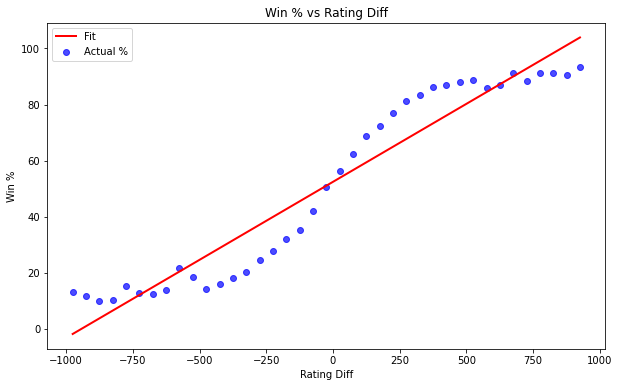

In [187]:
X = win_percentage['rating_diff_mid'].values
y = win_percentage['win_outcome'].values
X_b = np.c_[np.ones((len(X), 1)), X]
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
y_pred = X_b @ theta_best

# plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(X, y * 100, color='blue', alpha=0.7, label='Actual %')  # data points
plt.plot(X, y_pred * 100, color='red', linewidth=2, label='Fit')  #our regression line
plt.title('Win % vs Rating Diff')
plt.xlabel('Rating Diff')
plt.ylabel('Win %')
plt.legend()
plt.show()

In [188]:
def add_bias_column(X):
    """
    Args:
        X (array): can be either 1-d or 2-d
    
    Returns:
        Xnew (array): the same array, but 2-d  with a column of 1's in the first spot
    """
    
    # If the array is 1-d
    if len(X.shape) == 1:
        Xnew = np.column_stack([np.ones(X.shape[0]), X])
    
    # If the array is 2-d
    elif len(X.shape) == 2:
        bias_col = np.ones((X.shape[0], 1))
        Xnew = np.hstack([bias_col, X])
        
    else:
        raise ValueError("Input array must be either 1-d or 2-d")

    return Xnew

In [189]:
def line_of_best_fit(X, y):
    """ calculates the coefficients for the line of best fit for a set of data
    Args:
        X (array): can be either 1-d or 2-d
        y (array): 1-d array including all corresponding response values to X
        
    Returns:
        m (vector): contains coefficients for line of best fit 
    """
    #add the bias column to X
    Xnew = add_bias_column(X)
    
    # Inverse of Xnew.transpose * Xnew
    XtXinv = np.linalg.inv(np.matmul(Xnew.T, Xnew))
    
    # Xnew.transpose * y 
    Xty = np.matmul(Xnew.T, y)
    
    # [(XtX)^-1]Xty to get the vector w/ coefficients for line of best fit
    # m = [intercept, slope]
    m = np.matmul(XtXinv, Xty)
    return m

In [190]:
def linreg_predict(Xnew, ynew, m):
    """ calculates the predicted y values using the coefficients of the line of best fit for the data.
    calculates the residuals, mse, and r^2 between the predicted and actual y values.
    Args:
        Xnew (array): an array, either 1-d or 2-d which includes all the predictor features, not including bias term
        ynew (array): a 1-d array which includes all corresponding response values to Xnew
        m (vector): a 1-d array of length p+1 which contains the coefficients from the line_of_best_fit function
        
    Returns:
        linreg_dict (dictionary): dictionary containing key value pairs: ypreds, resids, mse, r2
    """
    Xnew = add_bias_column(Xnew)
    
    #calculating the predicted y values using the coefficients from line_of_best_fit
    ypreds = np.matmul(Xnew, m)

    #calculating residuals
    resids = ynew - ypreds

    #calculating mean square error (mse)
    sum_resids = 0
    for item in resids:
        sum_resids += item**2  
    mse = sum_resids/len(resids)

    #calculating r^2 value
    r2 = r2_score(ynew, ypreds)
    
    # Creating dictionary
    linreg_dict = {'ypreds' : ypreds,
                   'resids' : resids,
                   'mse' : mse,
                   'r2' : r2}
    return linreg_dict

### Cross Validation

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30)

#calculating coefficients for line of best fit
m = line_of_best_fit(X_train, y_train)

#running predictions and calculating MSE and R^2
linreg_dict = linreg_predict(X_test, y_test, m)
mse = linreg_dict["mse"]
r2 = linreg_dict['r2']
print(f'MSE: {mse}')
print(f'R^2: {r2}')

MSE: 0.011728668756325084
R^2: 0.8816169487745594


### Applying to entire dataset

In [192]:
linreg_dict = linreg_predict(X,y,theta_best)
resids = linreg_dict['resids']
mse = linreg_dict['mse']
r2 = linreg_dict['r2']
print(f'MSE: {mse}')
print(f'R^2: {r2}')

MSE: 0.008153554912551328
R^2: 0.923279666609376


### Residual Plots

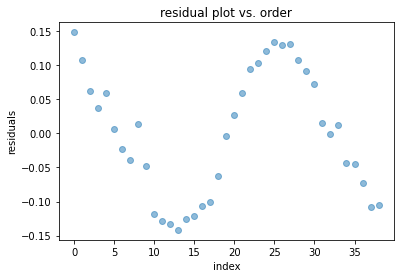

In [193]:
# residuals versus order
plt.scatter(range(len(X_b)), resids, alpha=0.5)
plt.xlabel("index")
plt.ylabel("residuals")
plt.title("residual plot vs. order")
plt.show()

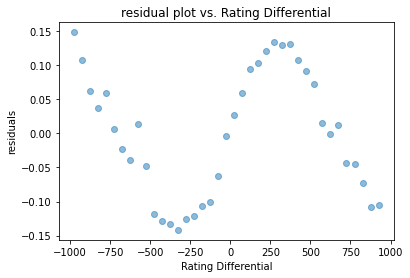

In [194]:
#residual plot vs Rating Diff
plt.scatter(X, resids, alpha=0.5)
plt.xlabel("Rating Differential")
plt.ylabel("residuals")
plt.title("residual plot vs. Rating Differential")
plt.show()

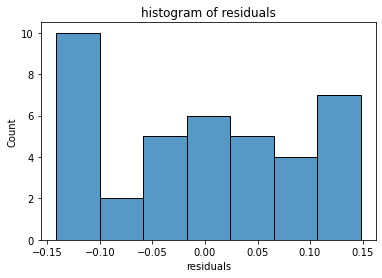

In [195]:
# histogram of residuals
sns.histplot(resids, kde=False)
plt.xlabel("residuals")
plt.title("histogram of residuals")
plt.show()

### Polynomial Exploration

Residual plots of the linear regression suggest we may need to look at trinomial or another variable since there are clear patterns. The residual plot as a function of the index shows an oscillating pattern indicating autocorrelation. The residual plot as a function of rating differential also shows the oscillating pattern indicating a non-linear dataset and heteroscedasticity. A normal distribution of the residuals is not present. Polynomial regression at the 3rd degree was implemented to potentiall address the issues

In [200]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(6, include_bias = False)
X_poly = poly.fit_transform(np.array(X).reshape(-1,1))

In [201]:
#fitting model to full dataset

#calculating coefficients to line of best fit
m_full = line_of_best_fit(X_poly, y)

#running predictions
linreg_dict = linreg_predict(X_poly, y, m_full)

mse = linreg_dict["mse"]
r2 = linreg_dict['r2']
resids = linreg_dict['resids']
print(f'MSE: {mse}')
print(f'R^2: {r2}')

MSE: 0.0005733397223464467
R^2: 0.9946051979637992


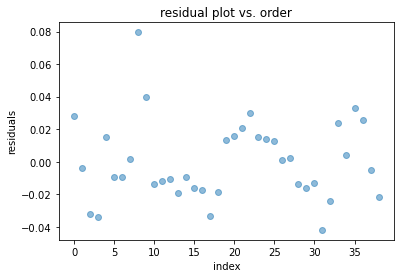

In [202]:
# residuals versus order
plt.scatter(range(len(X_poly)), resids, alpha=0.5)
plt.xlabel("index")
plt.ylabel("residuals")
plt.title("residual plot vs. order")
plt.show()

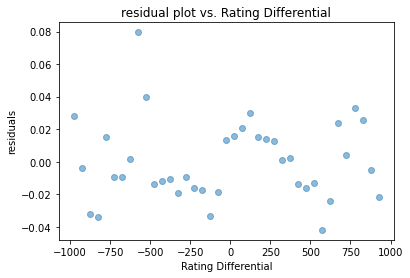

In [203]:
#residual plot vs Rating Diff
plt.scatter(X, resids, alpha=0.5)
plt.xlabel("Rating Differential")
plt.ylabel("residuals")
plt.title("residual plot vs. Rating Differential")
plt.show()

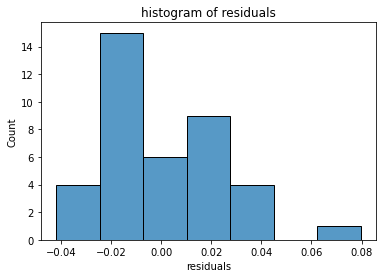

In [204]:
# histogram of residuals
sns.histplot(resids, kde=False)
plt.xlabel("residuals")
plt.title("histogram of residuals")
plt.show()

### Discussion
A trinomial linear regression did not address the issues observed in the regression plots for the monomial linear regression. A multiple regression will likely be the next step.

In [78]:
# clean openings
def clean_opening(name):
    for d in [":", " |", " #", " Accepted", " Declined", " Refused"]:
        name = name.split(d)[0]
    return name

# categorize ratings into buckets
def rate_cat(rate):
    if rate < 1200: return 'Below 1200'
    elif rate < 1400: return '1200-1399'
    elif rate < 1600: return '1400-1599'
    elif rate < 1800: return '1600-1799'
    elif rate < 2000: return '1800-1999'
    elif rate < 2200: return '2000-2199'
    elif rate < 2400: return '2200-2399'
    else: return '2400+'
    
def calc_diff(df, col1, col2, cond1, cond2):
    ''' calculates the difference between col1 and col2 modifies col3 based on given conditions
    Args:
        df (dataframe)- dataframe of interest
        col1 (string)- column name for differential calculation
        col2 (string)- column name for differential calculation
        col3 (string)- column name to be modified
        cond1 (string)- string to match for col2
        cond2 (string)- string to match for col2

    Returns:
        df (dataframe)- dataframe with updated col3
    '''
    for i in range(len(df)):
        game = df.loc[i]
        
        # Check conditions and assign values using .loc
        # If white's rating is higher and white won, no change to its differential value
        if game[col1] > 0 and game[col2] == cond1:
            df.loc[i, col1] = df.loc[i, col1] 
        # If black's rating is higher and black won, turn the differential to positive
        elif game[col1] < 0 and game[col2] == cond2:
          #  df.loc[i, col3] = 1
            df.loc[i, col1] = -df.loc[i, col1]
        else: 
            df.loc[i, col1] = np.nan
    return df

In [171]:
df = data.copy()

# build a column with the opening name and first variation
df['opening_name'] = df['opening'].str.split(":").str[0].str.strip()

# calculating the rating differential and adding to the df
#df['rating_diff'] = df['white_rating'] - df['black_rating']

#df = calc_diff(df, 'rating_diff', 'winner', 'white', 'black')
        
# reorder the columns in the dataframe
#df = df[['game_id', 'white', 'black', 'white_rating', 'black_rating', 'avg_rating', 'rating_cat', 
        # 'winner', 'rating_diff', 'opening', 'opening_name', 'clean_opening', 'move_count', 'link']]

df.head()

,game_id,white,white_rating,black,black_rating,opening,winner,moves,link,rating_diff,win_outcome,rating_diff_bin,opening_name
0,hN05at52,aapp_61,1678.0,zwenna,2442.0,Sicilian Defense: Bowdler Attack,black,54,https://lichess.org/hN05at52,-764.0,0.0,"(-800.0, -750.0]",Sicilian Defense
1,ttu4bd63,zwenna,2437.0,Aidas08,2136.0,"Sicilian Defense: Najdorf Variation, Zagreb Va...",white,77,https://lichess.org/ttu4bd63,301.0,1.0,"(300.0, 350.0]",Sicilian Defense
2,Qwoly8kd,Ugjgjgjvj,2058.0,zwenna,2434.0,"Italian Game: Two Knights Defense, Modern Bish...",black,44,https://lichess.org/Qwoly8kd,-376.0,0.0,"(-400.0, -350.0]",Italian Game
3,eMJwQKDV,zwenna,2433.0,Narcisse29,1820.0,"French Defense: Tarrasch Variation, Pawn Cente...",white,21,https://lichess.org/eMJwQKDV,613.0,1.0,"(600.0, 650.0]",French Defense
4,8AFBBfka,zwenna,2433.0,Bracho2013,1089.0,Ruy Lopez: Berlin Defense,white,57,https://lichess.org/8AFBBfka,1344.0,1.0,NaN,Ruy Lopez


In [172]:
len(df['opening_name'].unique())

137

In [173]:
df = pd.get_dummies(df, columns = ['opening_name'], drop_first = True)

In [174]:
df = df.dropna()

In [205]:
# standardize the black ratings and white ratings
for feat in ['white_rating', 'black_rating']:
    df[f'{feat}_scaled'] = (df[feat] - df[feat].mean()) / df[feat].std()
    
reg_df = df.drop(columns = ['game_id', 'white', 'white_rating', 'black', 'black_rating', 'opening', 'winner', 'link', 'rating_diff', 'rating_diff_bin', 'moves'], axis = 1)

reg_df['rating_interaction'] = reg_df.white_rating_scaled * reg_df.black_rating_scaled

In [215]:
df['moves'].max()

600

In [207]:
# build the X and y arrays using the scaled x values and the y values
X = reg_df.values
y = df['moves'].values

In [208]:
fitted_model = line_of_best_fit(X, y)

linreg_dict = linreg_predict(X,y,fitted_model)

fitted_model

resids = linreg_dict['resids']
mse = linreg_dict['mse']
r2 = linreg_dict['r2']
print(f'MSE: {mse}')
print(f'R^2: {r2}')

MSE: 1250.2917217882698
R^2: 0.0677737975509336


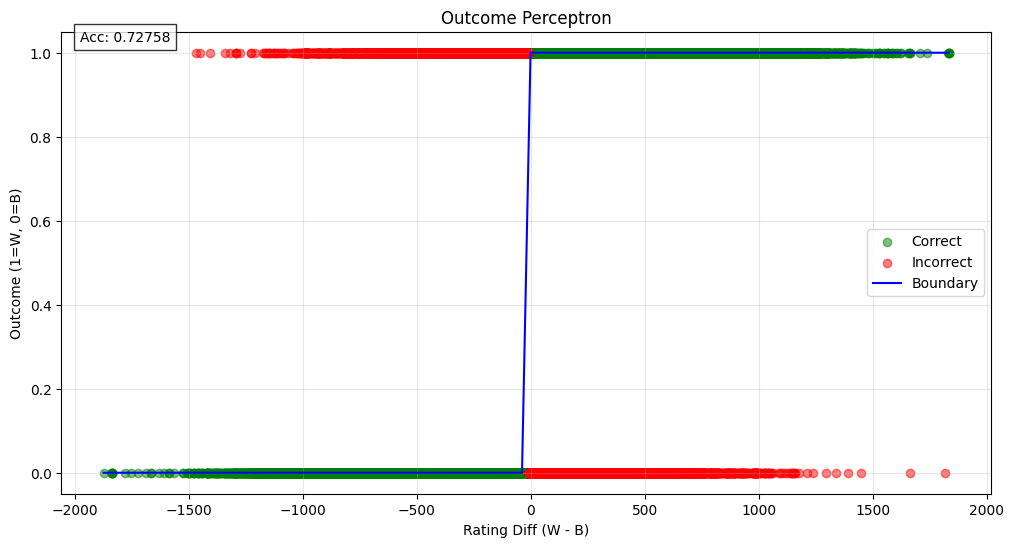

In [3]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Filter only the clear winners.
clear_games = data[data['win_outcome'] != 0.5].copy()

# input/output for perceptron
X_perc = clear_games['rating_diff'].values.reshape(-1, 1)
y_perc = (clear_games['win_outcome'] == 1).astype(int)  # white win = 1, black = 0

clf = Perceptron(random_state=42)  # train model
clf.fit(X_perc, y_perc)

# boundary points for visual
X_boundary = np.linspace(X_perc.min(), X_perc.max(), 100).reshape(-1, 1)
y_boundary = clf.predict(X_boundary)  

y_pred = clf.predict(X_perc)  # preds for data
misclassified = y_pred != y_perc  # misclassify info

# scatter points
plt.figure(figsize=(12, 6))
plt.scatter(X_perc[~misclassified], y_perc[~misclassified], c='green', alpha=0.5, label='Correct')  # correct
plt.scatter(X_perc[misclassified], y_perc[misclassified], c='red', alpha=0.5, label='Incorrect')  # wrong

plt.plot(X_boundary, y_boundary, 'b-', label='Boundary')  # decision line
plt.title('Outcome Perceptron')
plt.xlabel('Rating Diff (W - B)')
plt.ylabel('Outcome (1=W, 0=B)')
plt.legend()
plt.grid(True, alpha=0.3)

accuracy = accuracy_score(y_perc, y_pred)  # model acc
plt.text(0.02, 0.98, f'Acc: {accuracy:.5f}', transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

plt.show()
